# Hierarchical Clustering

In this example we will be using '[Wholesale customers data.csv](https://archive.ics.uci.edu/dataset/292/wholesale+customers)' dataset from UCI Machine Learning Repository.

The values represent the Customer spend on each of the products.  The objective is to segment these customers based on their purchase patterns.

In [1]:
# prompt: Load libraries for k means clustering

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# you can add more libraries as needed, for example:
# from sklearn.preprocessing import StandardScaler
# import seaborn as sns


In [2]:
# prompt: load "Wholesale customers data.csv"

# Load the dataset
df = pd.read_csv('Wholesale customers data.csv')

df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
# prompt: Normalize the data

from sklearn.preprocessing import StandardScaler

# Select features for normalization (excluding customer ID and region)
features_to_normalize = ['Channel','Region','Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

# Create a scaler object
scaler = StandardScaler()

# Fit the scaler on the selected features and transform the data
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


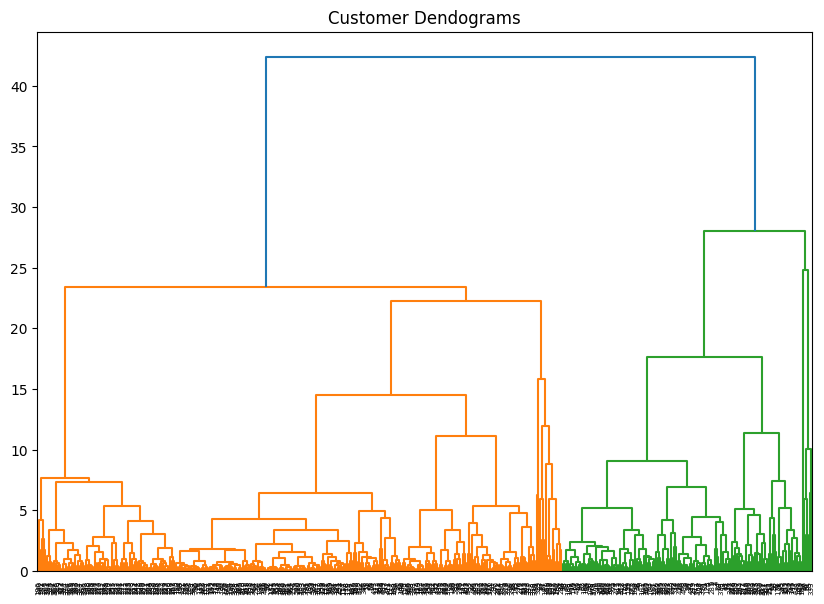

In [4]:
# prompt: Perform Hierarchical Cluster and plot Dendogram

import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(df[features_to_normalize], method='ward'))

The x-axis contains the Samples and y-axis represents the distance between Samples.

The Vertical Line that is the longest is the Blue Line - meaning it has the highest separation between Samples.  Therefore, we can draw a Horizontal Line at 35 which cuts 2 Vertical Lines suggesting 2 Clusters.

### Agglomerative Clustering

In [16]:
# prompt: Perform Agglomerative clustering for 2 clusters

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
cluster.fit_predict(df[features_to_normalize])

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,

In [17]:
# prompt: Display the size of each cluster

df['cluster'] = cluster.fit_predict(df[features_to_normalize])

# Display the size of each cluster
print(df['cluster'].value_counts())

cluster
1    298
0    142
Name: count, dtype: int64


In [18]:
# prompt: Create a weightage table with Clusters in rows and Features in columns

# Calculate the mean of each feature for each cluster
cluster_means = df.groupby('cluster').mean()

# Transpose the table to have features as columns
cluster_means = cluster_means.T

# Rename the columns to represent the clusters
cluster_means.columns = [f'Cluster {i}' for i in cluster_means.columns]

# Display the weightage table
cluster_means

,Cluster 0,Cluster 1
Channel,1.433589,-0.683119
Region,0.089856,-0.042817
Fresh,-0.239233,0.113997
Milk,0.674614,-0.321460
Grocery,0.880556,-0.419594
Frozen,-0.247122,0.117756
Detergents_Paper,0.915321,-0.436160
Delicassen,0.159691,-0.076094


**Cluster 0:**  


*   High Weightages for Channel, Milk, Grocery and Detergents.  
*   Most likely Convenient Stores or larger

**Cluster 1:**  


*   Scores low on all other categories
*   Most likely Small stores where Customers buy small quantities and spend less.





However, having just 2 Clusters is too broad ... let us try 3 Clusters.

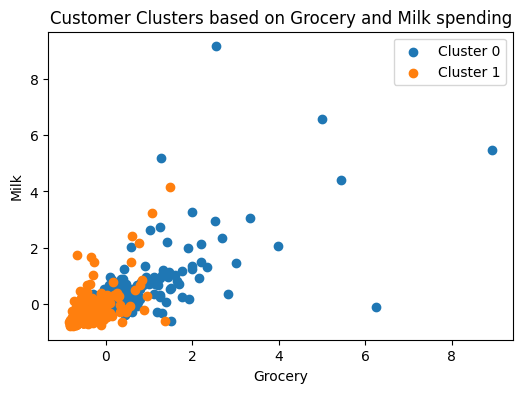

In [20]:
# prompt: Visualize the Clusters created including legend

import matplotlib.pyplot as plt

# Assuming 'df' and 'features_to_normalize' are defined from the previous code

plt.figure(figsize=(6, 4))
for cluster_label in df['cluster'].unique():
    cluster_data = df[df['cluster'] == cluster_label]
    plt.scatter(cluster_data['Grocery'], cluster_data['Milk'], label=f'Cluster {cluster_label}')

plt.xlabel('Grocery')
plt.ylabel('Milk')
plt.title('Customer Clusters based on Grocery and Milk spending')
plt.legend()
plt.show()

In [11]:
# prompt: Perform Agglomerative clustering for 3 clusters

# Perform Agglomerative clustering for 3 clusters
cluster = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster.fit_predict(df[features_to_normalize])

df['cluster'] = cluster.fit_predict(df[features_to_normalize])

# Display the size of each cluster
print(df['cluster'].value_counts())

# Calculate the mean of each feature for each cluster
cluster_means = df.groupby('cluster').mean()

# Transpose the table to have features as columns
cluster_means = cluster_means.T

# Rename the columns to represent the clusters
cluster_means.columns = [f'Cluster {i}' for i in cluster_means.columns]

# Display the weightage table
cluster_means

cluster
1    298
2    136
0      6
Name: count, dtype: int64


,Cluster 0,Cluster 1,Cluster 2
Channel,1.092160,-0.683119,1.448652
Region,0.375167,-0.042817,0.077269
Fresh,1.225106,0.113997,-0.303836
Milk,5.120181,-0.321460,0.478486
Grocery,4.913134,-0.419594,0.702648
Frozen,1.075185,0.117756,-0.305459
Detergents_Paper,4.648220,-0.436160,0.750634
Delicassen,3.096654,-0.076094,0.030119


Cluster 0 is very small with just 6 entities.  Therefore, it does not make sense to have the 3rd cluster.

We therefore, revert to the Hierarchical Clustering model with 2 Clusters.



---

### Divisive Hierarchical Clustering

In [21]:
# prompt: Create a Divisive Hierarchical Clustering model using the scaled data

from sklearn.cluster import AgglomerativeClustering

# Assuming 'df' and 'features_to_normalize' are defined from the previous code

# Perform Divisive Hierarchical Clustering (using AgglomerativeClustering with ward linkage and reversed cluster assignments)
cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
cluster.fit(df[features_to_normalize])

# Reverse the cluster assignments to simulate divisive clustering
df['cluster'] = 1 - cluster.labels_

# Display the size of each cluster
print(df['cluster'].value_counts())

# Calculate the mean of each feature for each cluster
cluster_means = df.groupby('cluster').mean()

# Transpose the table to have features as columns
cluster_means = cluster_means.T

# Rename the columns to represent the clusters
cluster_means.columns = [f'Cluster {i}' for i in cluster_means.columns]

# Display the weightage table
cluster_means

cluster
0    298
1    142
Name: count, dtype: int64


,Cluster 0,Cluster 1
Channel,-0.683119,1.433589
Region,-0.042817,0.089856
Fresh,0.113997,-0.239233
Milk,-0.321460,0.674614
Grocery,-0.419594,0.880556
Frozen,0.117756,-0.247122
Detergents_Paper,-0.436160,0.915321
Delicassen,-0.076094,0.159691


**Observations:**  
The characteristics of both clusters are similar to Agglomerative Clustering.